In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
import scienceplots

In [2]:
# science plots
plt.style.use(['science','ieee'])

Expected value of f(W_t) = 11.998095962601315
Mean of f(W_t) = 11.998095962601315
Variance of f(W_t) = 1599.105817388189


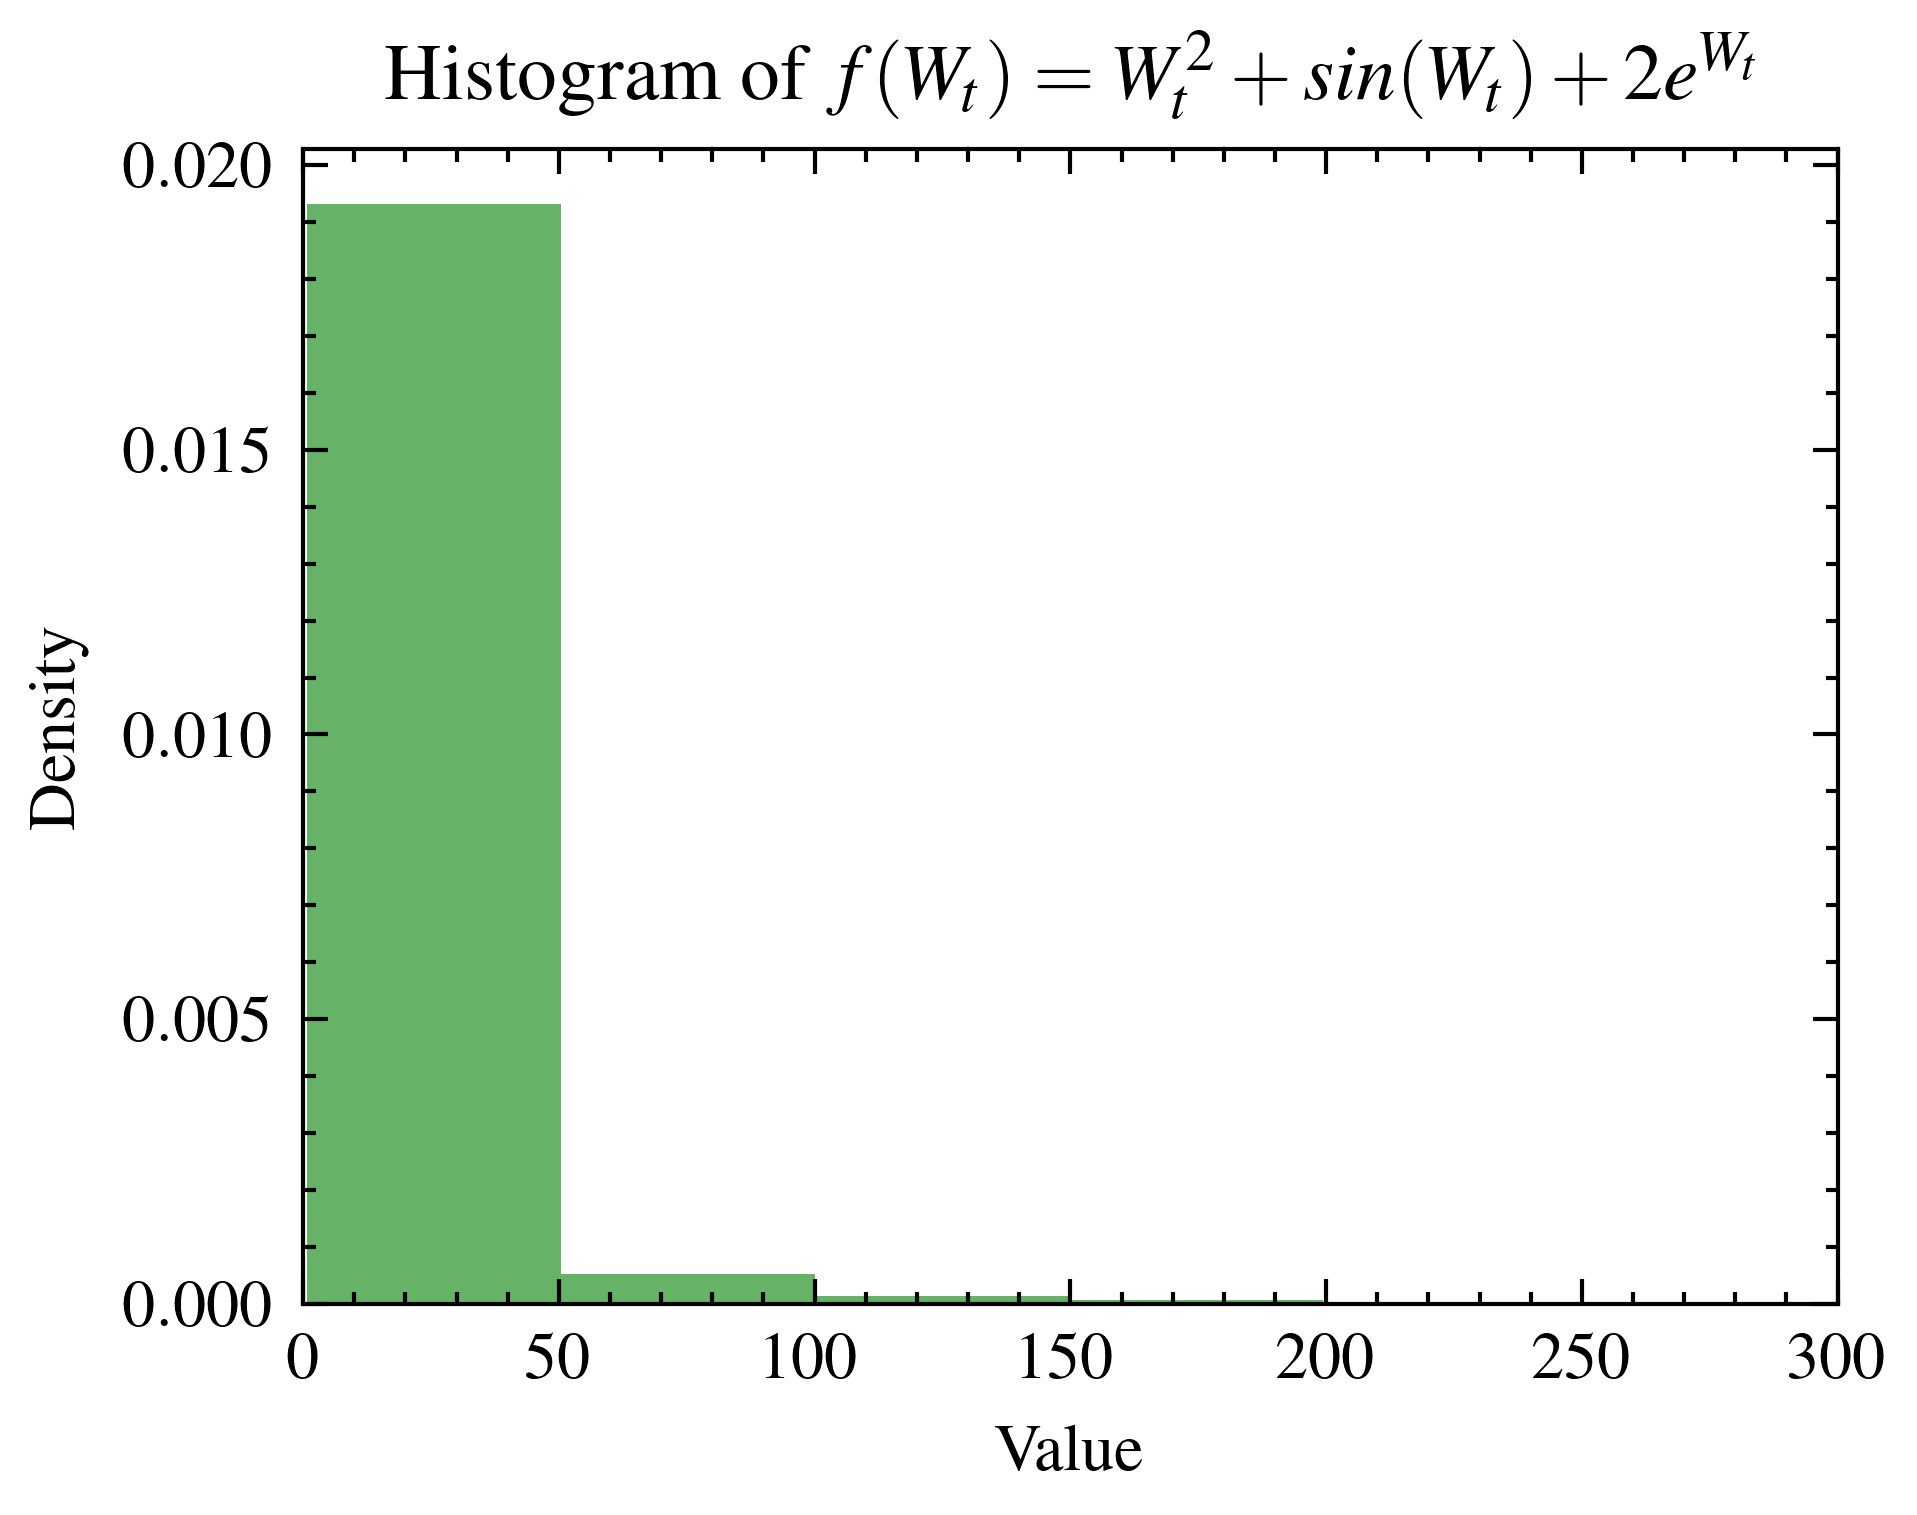

In [3]:
# Estimate the following expected value: E(W_3^2 + sin(W_3) + 2e^{W_3})
# Where W_t is a standard Wiener process, that is the drift parameter is zero and the Variance parameter sigma^2 = 1.

# The expected value of a function of a Wiener process is given by the following formula:
# E(f(W_t)) = \int_{-\infty}^{\infty} f(x) * \frac{1}{\sqrt{2\pi t}} * e^{-\frac{x^2}{2t}} dx
# Where t is the time at which we are evaluating the function f, and x is the value of the Wiener process at time t.

# Number of simulations, samples and time steps
N = 200000
n = 200000
t = 3

# Generate N samples of the Wiener process at time t
W_t = np.random.normal(0, np.sqrt(t), N)

# Calculate the expected value of the function f(W_t) = W_t^2 + sin(W_t) + 2e^{W_t}
f_W_t = W_t**2 + np.sin(W_t) + 2*np.exp(W_t)

# Calculate the expected value of the function f(W_t) using the formula
expected_value = np.mean(f_W_t)

print(f"Expected value of f(W_t) = {expected_value}")

# Print statistics
print(f"Mean of f(W_t) = {np.mean(f_W_t)}")
print(f"Variance of f(W_t) = {np.var(f_W_t)}")

# Plot the histogram of the function f(W_t)
plt.hist(f_W_t, bins=100, density=True, alpha=0.6, color='g')
plt.title("Histogram of $f(W_t) = W_t^2 + sin(W_t) + 2e^{W_t}$")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim(0, 300)
plt.show()

In [4]:
# find the contributing term that is explaining the most variance
# W_t^2
W_t_squared = W_t**2
print(f"Mean of W_t^2 = {np.mean(W_t_squared)}")
print(f"Variance of W_t^2 = {np.var(W_t_squared)}")

# sin(W_t)
sin_W_t = np.sin(W_t)
print(f"Mean of sin(W_t) = {np.mean(sin_W_t)}")
print(f"Variance of sin(W_t) = {np.var(sin_W_t)}")

# 2e^{W_t}
exp_W_t = 2*np.exp(W_t)
print(f"Mean of 2e^W_t = {np.mean(exp_W_t)}")
print(f"Variance of 2e^W_t = {np.var(exp_W_t)}")


Mean of W_t^2 = 3.010843694670056
Variance of W_t^2 = 17.999999229761908
Mean of sin(W_t) = -0.0010763730984487104
Variance of sin(W_t) = 0.4991908816642314
Mean of 2e^W_t = 8.988328641029712
Variance of 2e^W_t = 1418.613076055337


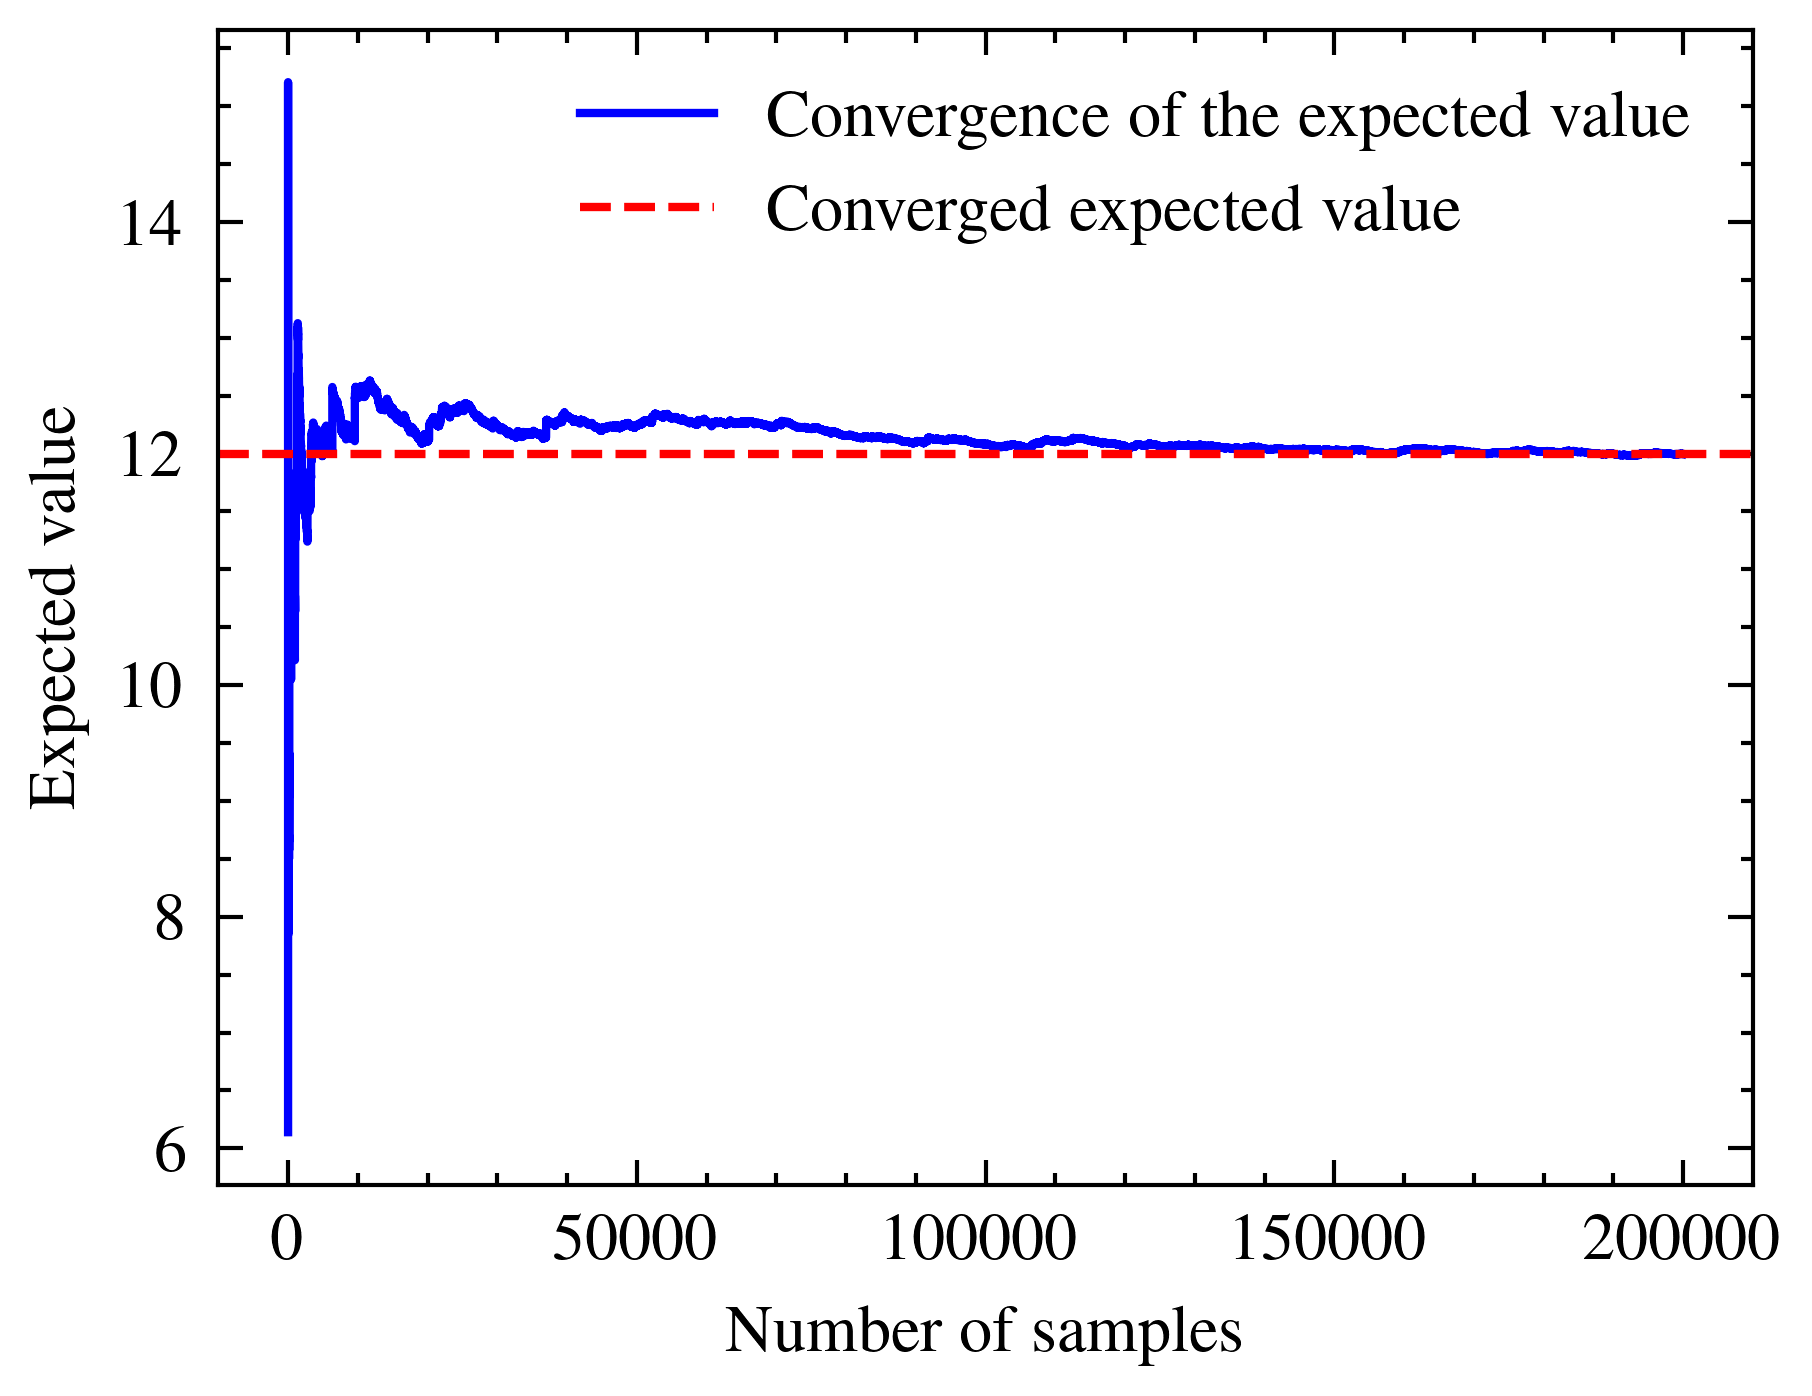

In [5]:
# Make a plot of the convergence of the expected value as the number of samples increases, with a red line indicating the true value of the expected value
E_n = np.zeros(n)
f = f_W_t[:n]
E = expected_value
for i in range(n):
    E_n[i] = np.mean(f[:i+1])
plt.plot(E_n, label='Convergence of the expected value', color='b')
plt.axhline(y=E, color='r', linestyle='--', label='Converged expected value')
plt.xlabel('Number of samples')
plt.ylabel('Expected value')
plt.legend()
plt.show()

In [6]:
# Let S𝑡 be a Geometric Brownian Motion process: S_t = S_0e^{sigma W_t + (r-sigma^2/2)t} 
# where r = 0.05, sigma = 0.2, S_0 = 90, and W_t is a standard Wiener process. Estimate
# E[S_3].

# Number of Geometric Brownian Motion processes to simulate
N = 20000
 
# Parameters
r = 0.05
sigma = 0.2
S0 = 90
t = 3

# Generate N samples of the Wiener process at time t
W = np.random.normal(0, np.sqrt(t), N)

# Calculate the expected value of the Geometric Brownian Motion process at time t
S = S0*np.exp(sigma*W + (r - sigma**2/2)*t)
E = np.mean(S)
print('The expected value of the Geometric Brownian Motion process at time t is:', E)

# Real value of the expected value
E_real = S0*np.exp(r*t)
print('The real value of the expected value is:', E_real)


The expected value of the Geometric Brownian Motion process at time t is: 104.43933112283499
The real value of the expected value is: 104.56508184554548


In [7]:
# Evaluate the following expected value and probability:
# E[X_2^0.6] and P(X_2 > 2)
# Where the Ito's Processes evolve according to the following stochastic differential equation:
# dX_t = (1/4 + 1/3X_t)dt + 3/5dW_t, X_0 = 2
# and W_t is a standard Wiener process.

# Ornstein-Uhlenbeck process parameters
N = 20000
n = 20000
X0 = 2
t = 2


# Generate N samples of the Ornstein-Uhlenbeck process at time t
X = np.zeros(N)
X[0] = X0

for i in range(1, N):
    dW = np.random.normal(0, np.sqrt(t/N))
    X[i] = X[i-1] + (1/4 + 1/3*X[i-1])*t/N + 3/5*dW
    
# Calculate the expected value of the function f(X_t) = X_t^0.6
f = X**0.6
E = np.mean(f)

# Calculate the probability P(X_2 > 2)
P = np.mean(X > 2)
print('The expected value of the function f(X_t) = X_t^0.6 is:', E)
print('The probability P(X_2 > 2) is:', P)


The expected value of the function f(X_t) = X_t^0.6 is: 1.9049270669623246
The probability P(X_2 > 2) is: 0.84825


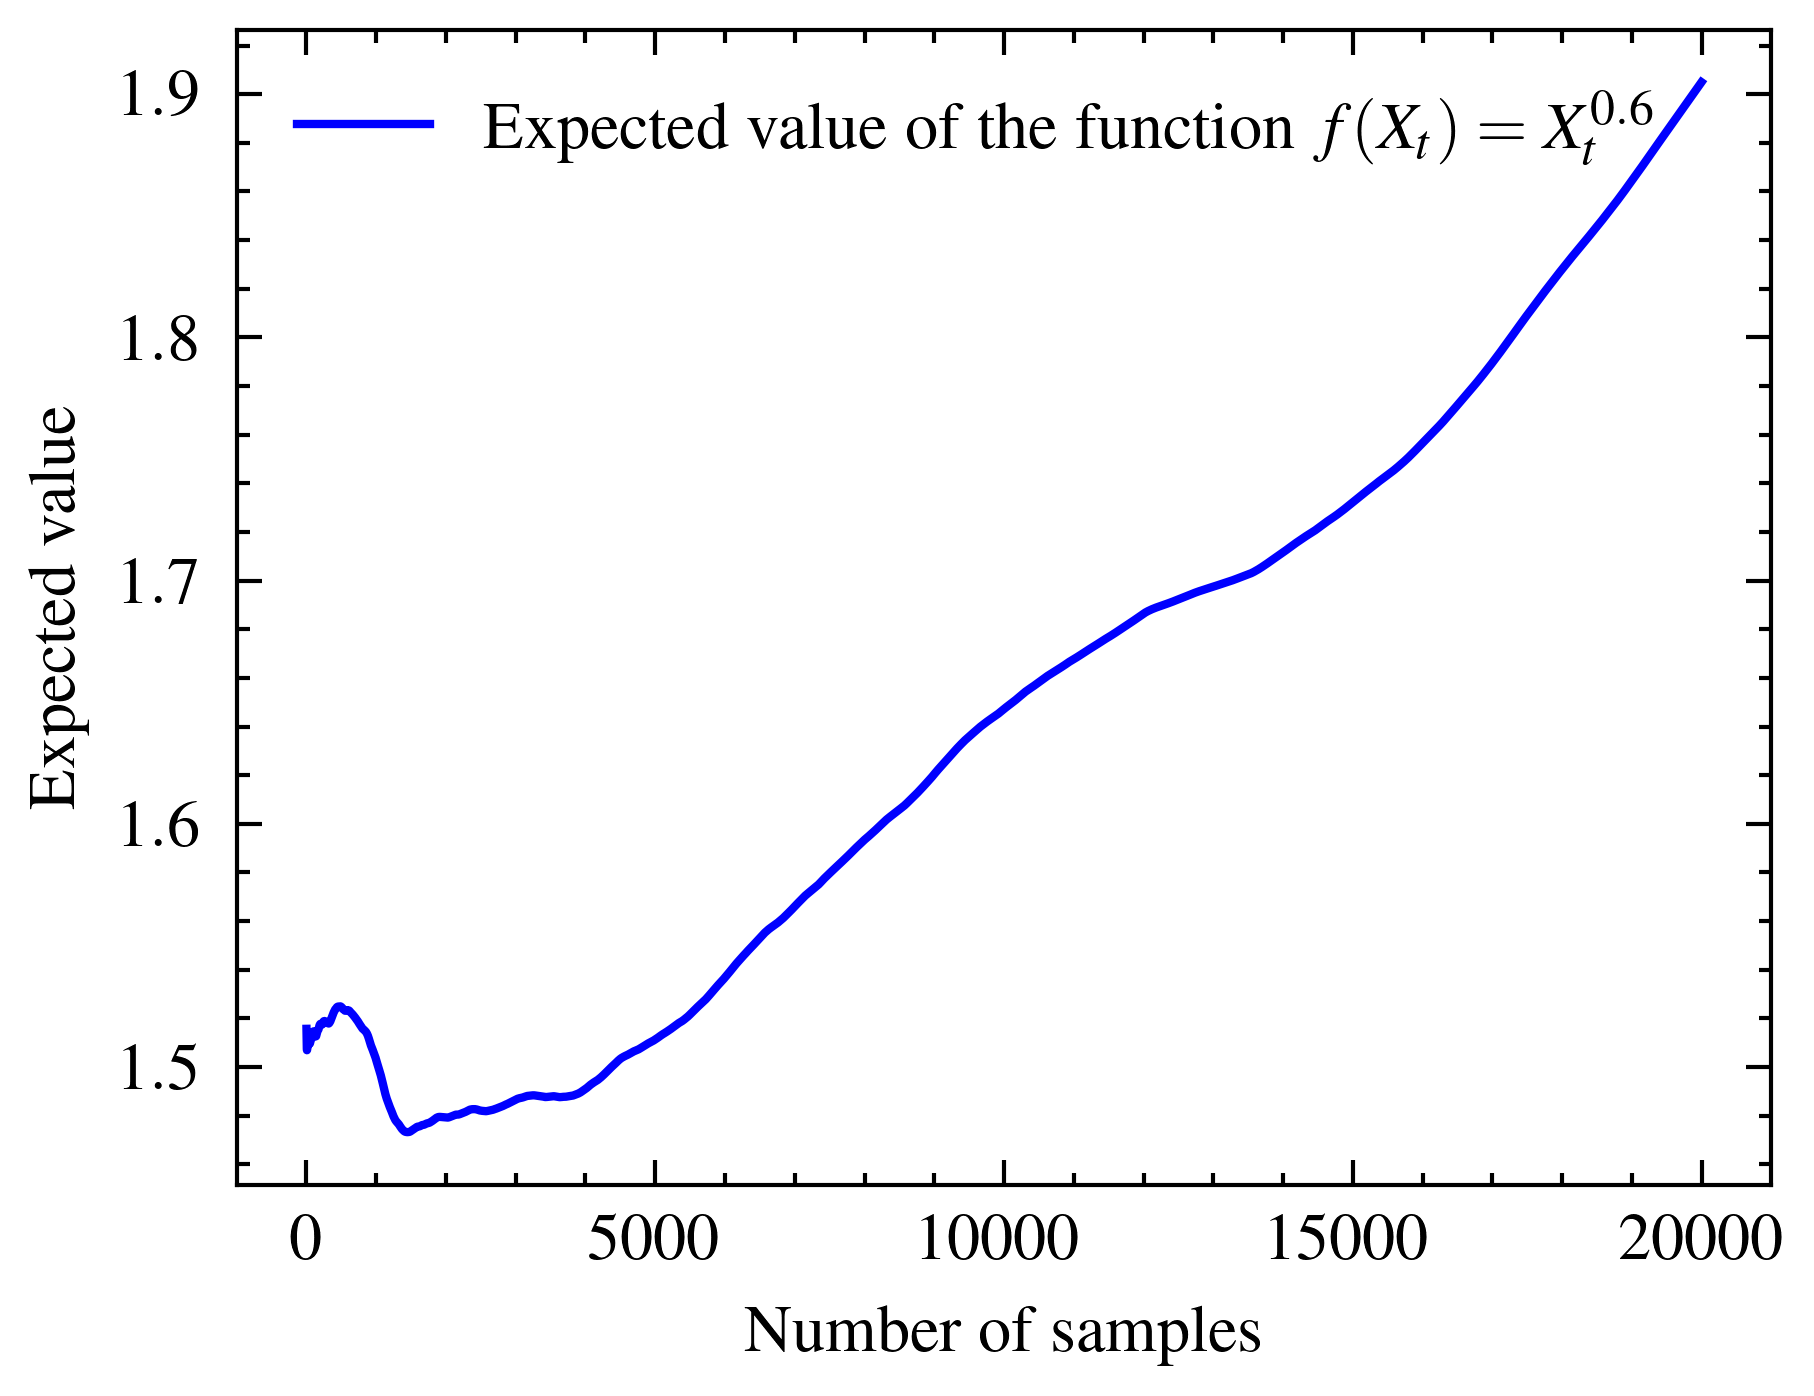

In [8]:
# plot the expected value accross iterations
E_n = np.zeros(n)
for i in range(n):
    E_n[i] = np.mean(f[:i+1])
plt.plot(E_n, label='Expected value of the function $f(X_t) = X_t^{0.6}$', color='b')
plt.xlabel('Number of samples')
plt.ylabel('Expected value')
plt.legend()
plt.show()

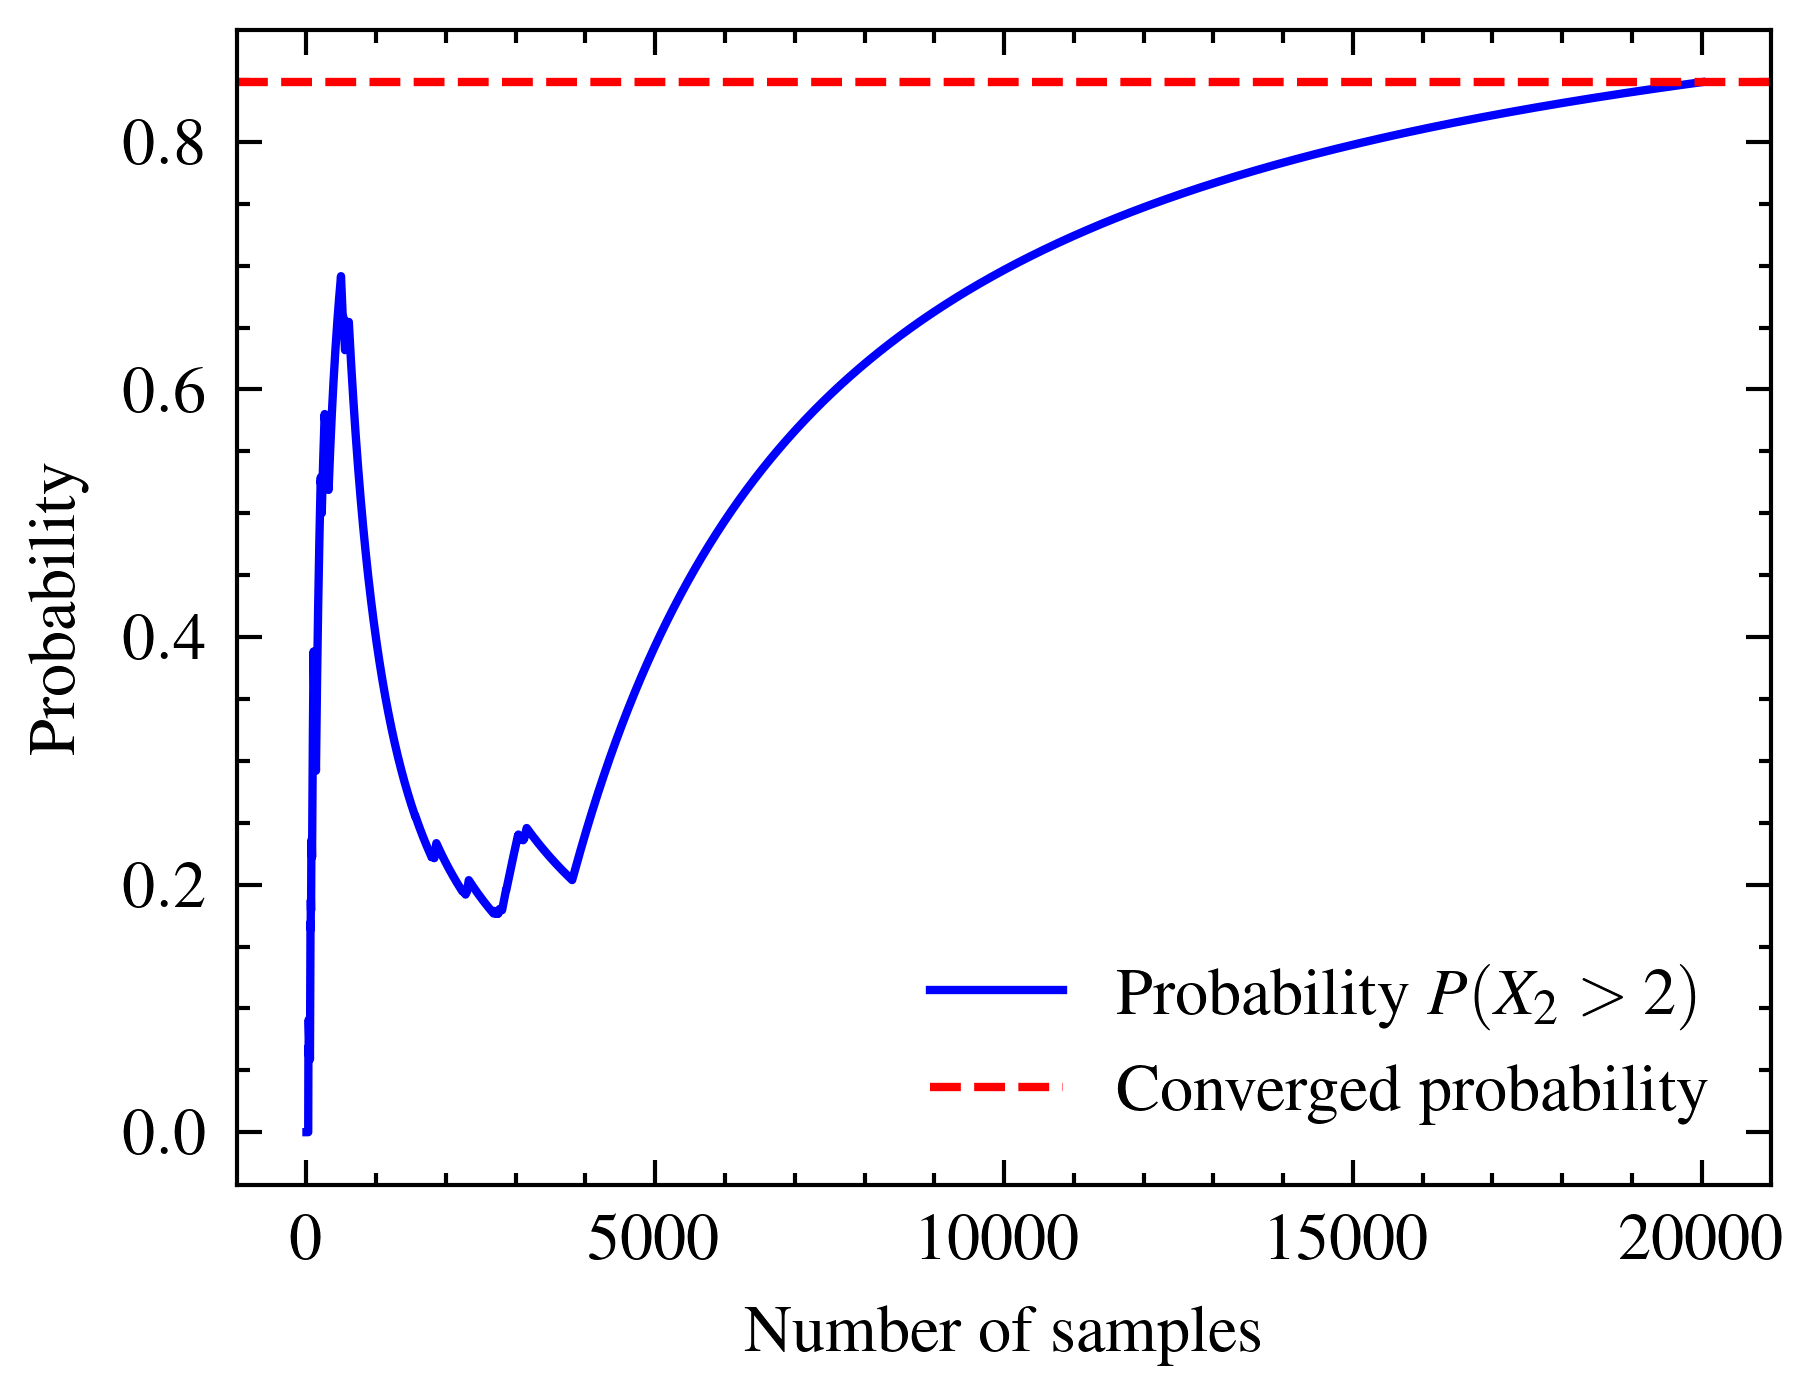

In [9]:
# probability of X_2 > 2
P_n = np.zeros(n)
for i in range(n):
    P_n[i] = np.mean(X[:i+1] > 2)
plt.plot(P_n, label='Probability $P(X_2 > 2)$', color='b')
plt.axhline(y=P, color='r', linestyle='--', label='Converged probability')
plt.xlabel('Number of samples')
plt.ylabel('Probability')
plt.legend()
plt.show()

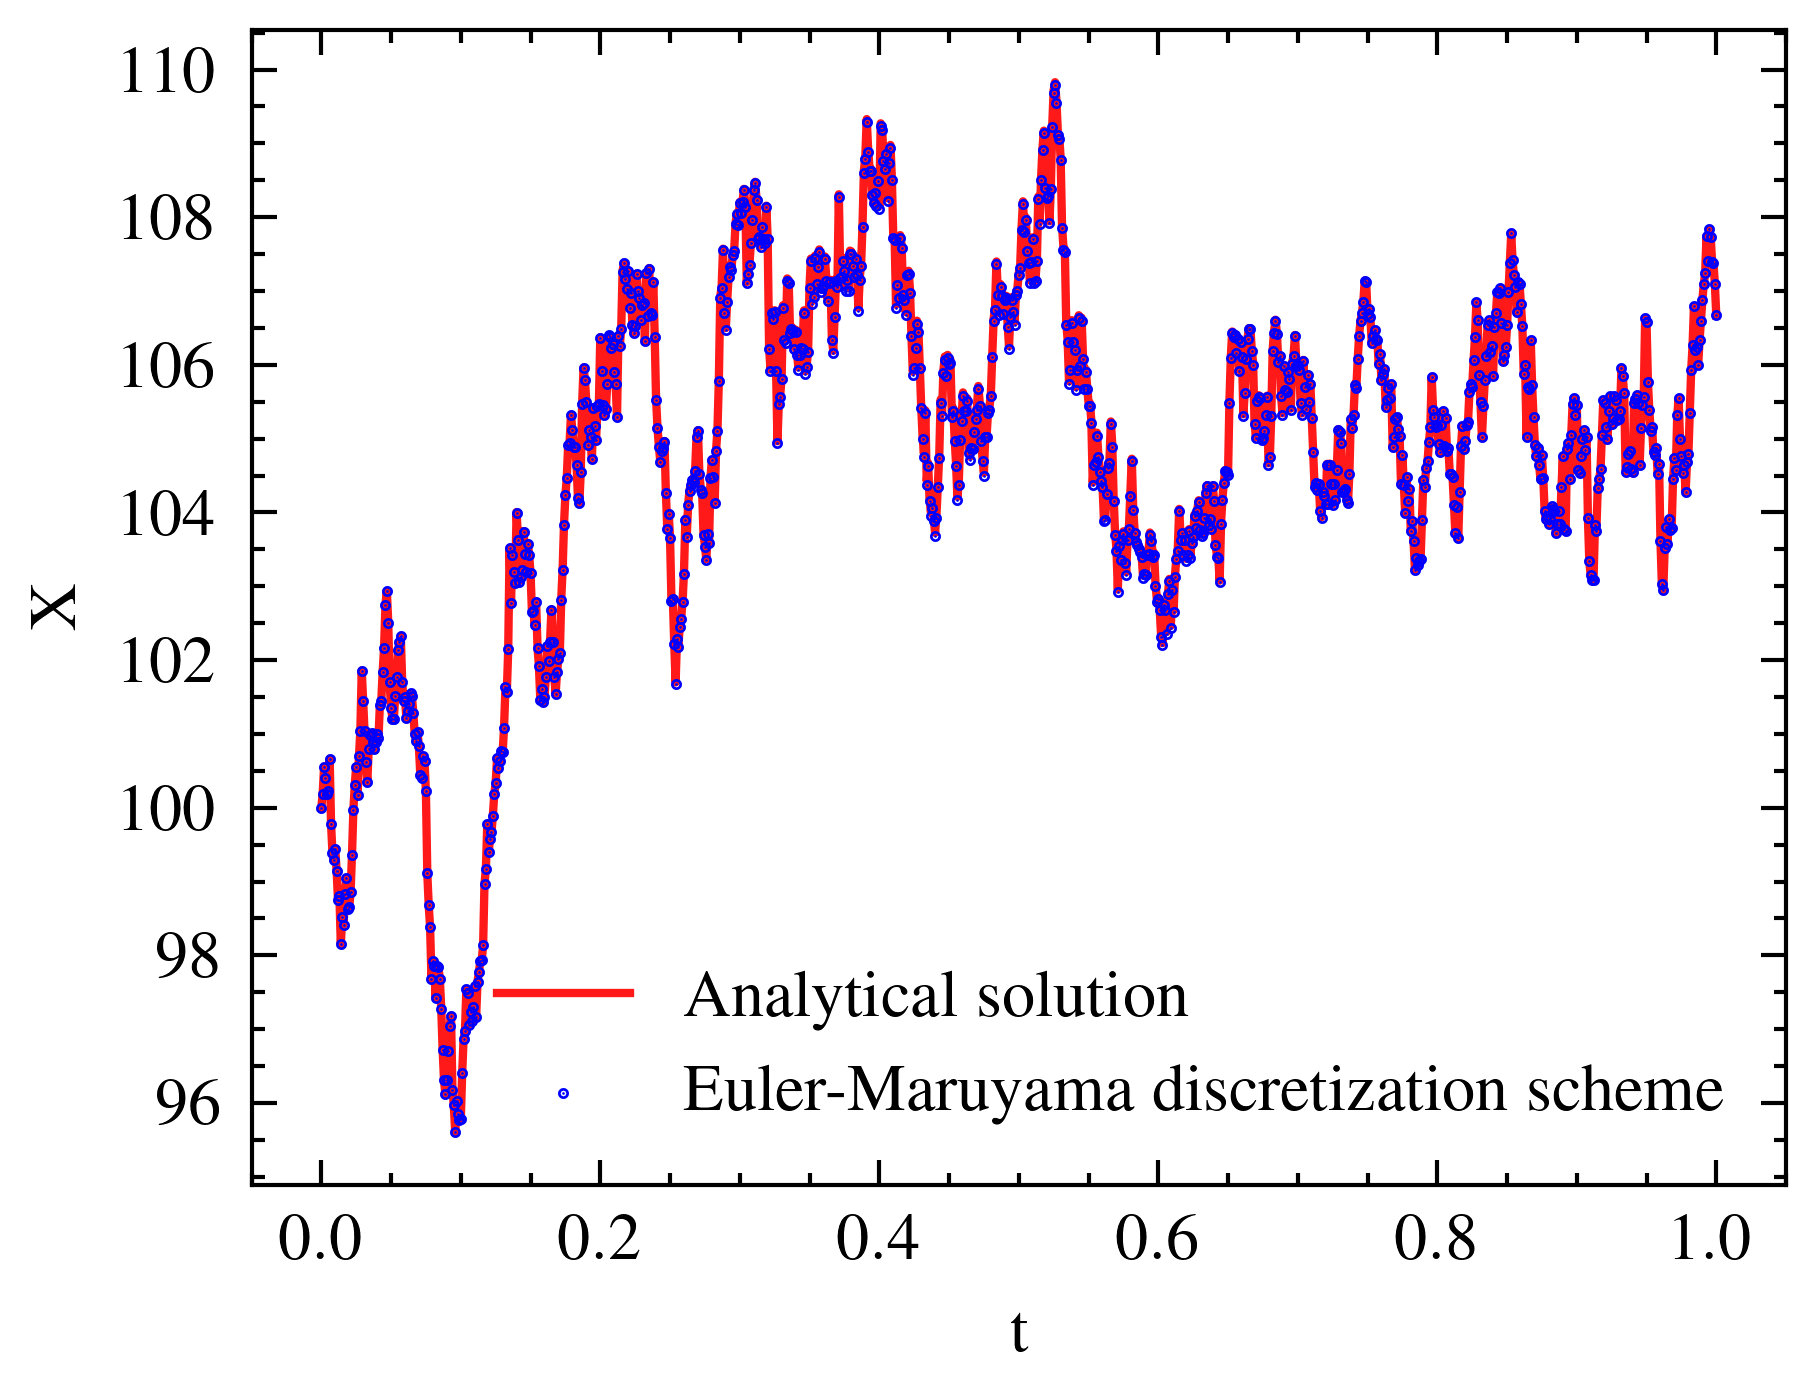

Difference:  17.024969385265422


In [10]:
# Consider the following SDE:
# dX_t = aX_tdt + bX_tdW_t, X_0 = 100, a = 0.07, b = 0.12

# a) Simulate this stochastic process using the discretization schemes of Euler-Maruyama
# b) Compare with the analytical solution.

# a) Simulate the stochastic process using the discretization schemes of Euler-Maruyama

# Parameters
a = 0.07
b = 0.12
X0 = 100
T = 1
N = 1000
dt = T/N
t = np.linspace(0, T, N+1)
W = np.zeros(N+1)
X = np.zeros(N+1)
X[0] = X0
# Euler-Maruyama discretization scheme
for i in range(N):
    dW = np.sqrt(dt)*np.random.normal(0, 1)
    X[i+1] = X[i] + a*X[i]*dt + b*X[i]*dW
    W[i+1] = W[i] + dW
    
# b) Compare with the analytical solution
# Analytical solution
X_analytical = X0*np.exp((a - b**2/2)*t + b*W)
# Plot the analytical solution and the Euler-Maruyama discretization scheme
# plot difference between the analytical solution and the Euler-Maruyama discretization scheme
plt.plot(t, X_analytical, label='Analytical solution', color='r', alpha=0.9, zorder=-1)
# plt.plot(t, X, label='Euler-Maruyama discretization scheme', color='b', alpha=0.4)
# scatter plot
plt.scatter(t, X, label='Euler-Maruyama discretization scheme', color='b', alpha=1, s=0.1, zorder=1)
plt.xlabel('t')
plt.ylabel('X')
plt.legend()
plt.show()

# print total difference between the analytical solution and the Euler-Maruyama discretization scheme
total_difference = np.sum(np.abs(X - X_analytical))
print('Difference: ', total_difference)

In [11]:
# the two plots are very similar, plot the difference between the two
plt.plot(t, np.abs(X - X_analytical)/X_analytical, label='Difference between the analytical solution and the Euler-Maruyama discretization scheme')
plt.xlabel('t')
plt.ylabel('Relative Difference (%)')
plt.title('Difference between the analytical solution and the Euler-Maruyama discretization scheme')

Text(0.5, 1.0, 'Difference between the analytical solution and the Euler-Maruyama discretization scheme')